<a href="https://www.kaggle.com/code/kelixirr/customer-personality-analysis-end-to-end?scriptVersionId=135568093" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Customer Personality Analysis
Analysis of company's ideal customers

### About Dataset

Context

Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
#### Attributes

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
Need to perform clustering to summarize customer segments.

#### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

In [1]:
# importing tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data 
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Analyzing our data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
len(data)

2240

In [8]:
data.shape

(2240, 29)

In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
data.duplicated().sum()

0

In [11]:
# removing the missing values

data = data.dropna()
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Feature Engineering

In [13]:
import datetime

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
    
print(max(dates))  # new date
print(min(dates))  # old date 

2014-12-06
2012-01-08


/tmp/ipykernel_20/2728175165.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [14]:
# Customer_For feature: number of days the customers started to shop

days = []
d1 = max(dates)

for i in dates:
    
    delta = d1 - i 
    
    days.append(delta)

data["Customer_For"] = days 
data["Customer_For"] = pd.to_datetime(data["Customer_For"], errors = "coerce")

In [15]:
# let's check the categorical values

print(data["Marital_Status"].value_counts())
print(data["Education"].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [16]:
# customer age 
data["Age"] = 2023 - data["Year_Birth"]

# total spending on various items
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# living standard by "Alone"
data["Living_With"] = data["Marital_Status"].replace({
    
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone"
})

# total children in house 
data["Children"] = data["Kidhome"] + data["Teenhome"]

#total members
data["Family_Size"] = data["Living_With"].replace({"Alone":1,
                                                  "Partner": 2}) + data["Children"]

#Parent 
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

# segmenting education level 
data["Education"] = data["Education"].replace({
    
    "Basic": "Undergraduate",
    "2nd Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

#renaming columns
data = data.rename(columns={
    
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold",
})

# dropping redundant columns
data.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,NaT,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,NaT,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,NaT,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,NaT,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,NaT,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,NaT,56,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,NaT,77,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,NaT,42,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,NaT,67,843,Partner,1,3,1


In [17]:
# stats
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.013538,0.009477,3.0,11.0,0.150271,54.179603,607.075361,0.947202,2.592509,0.714350
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.115588,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,3.0,11.0,0.000000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,3.0,11.0,0.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,1.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


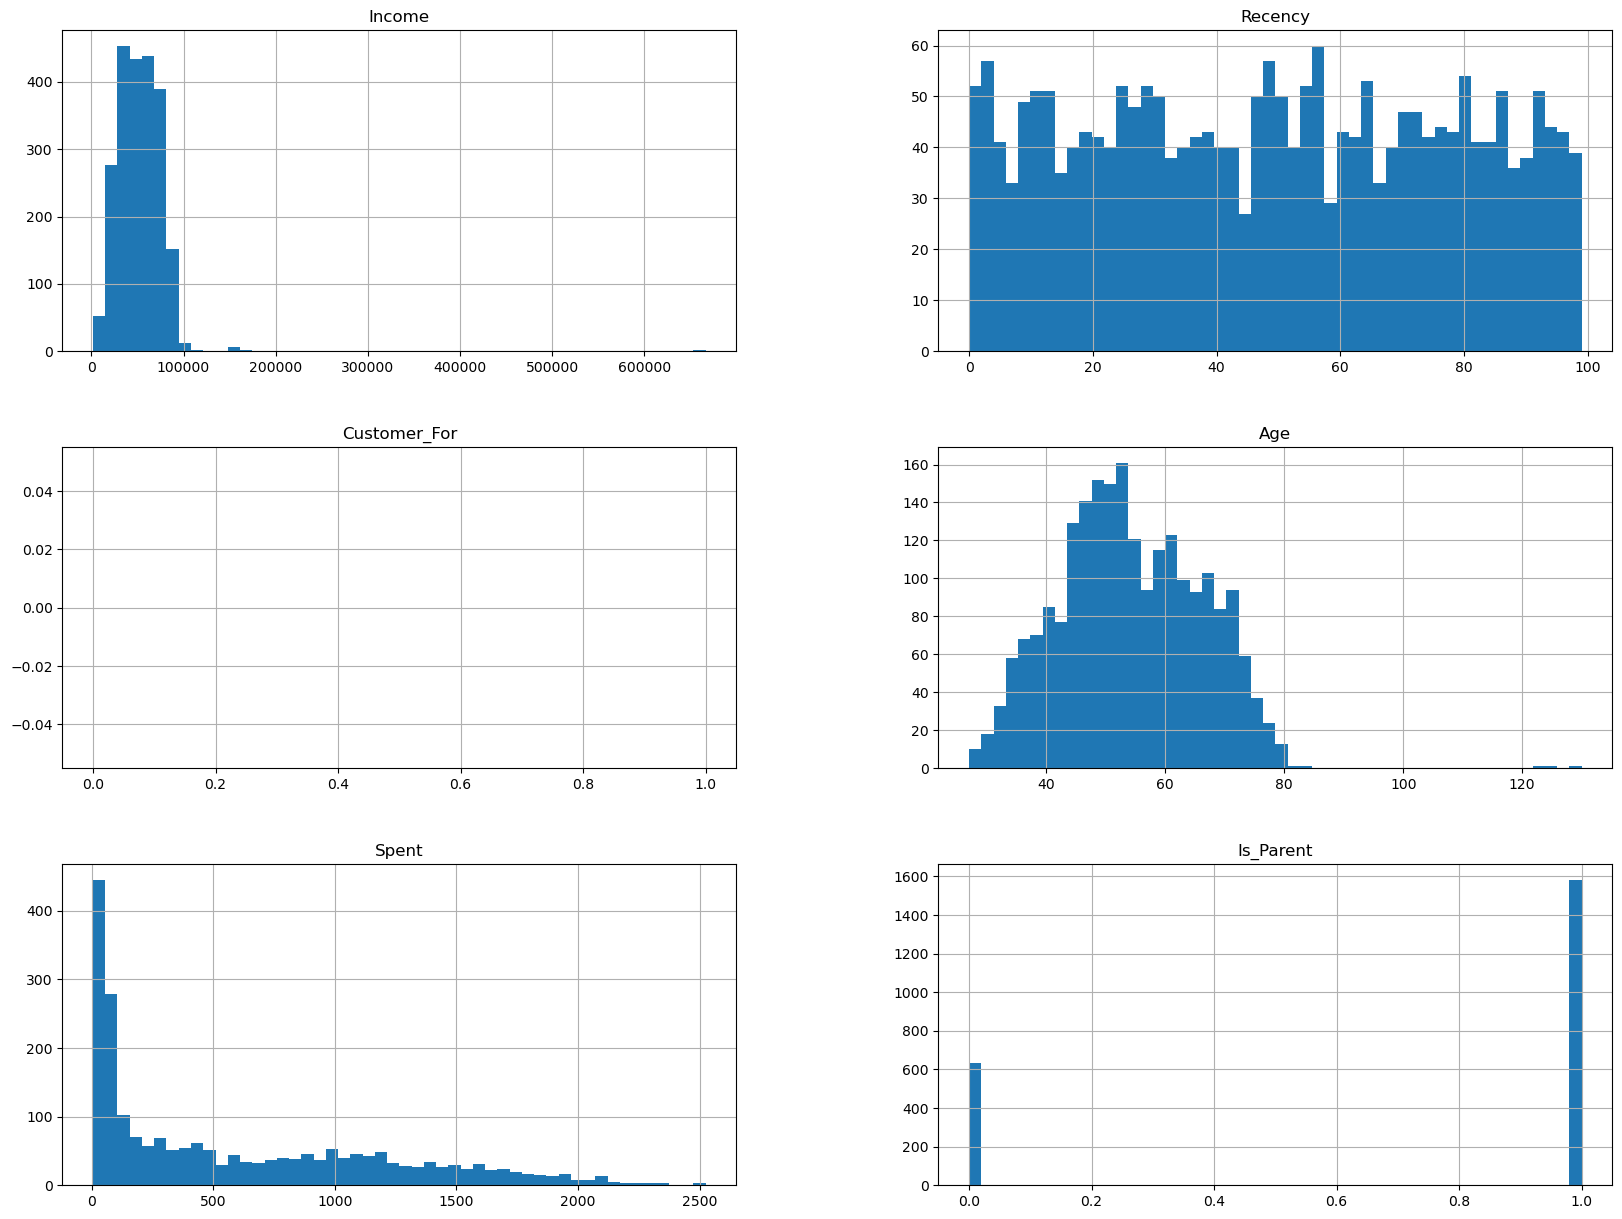

In [18]:
# checking for the outliers in the data 
data.hist(column=["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"], bins=50, figsize=(20,15))
plt.show()

We have a few outliers in income and age 

In [19]:
# removing outliers
data = data[(data["Age"]<90)]
data = data[(data["Income"] < 600000)]
len(data)

2212

/tmp/ipykernel_20/252579322.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


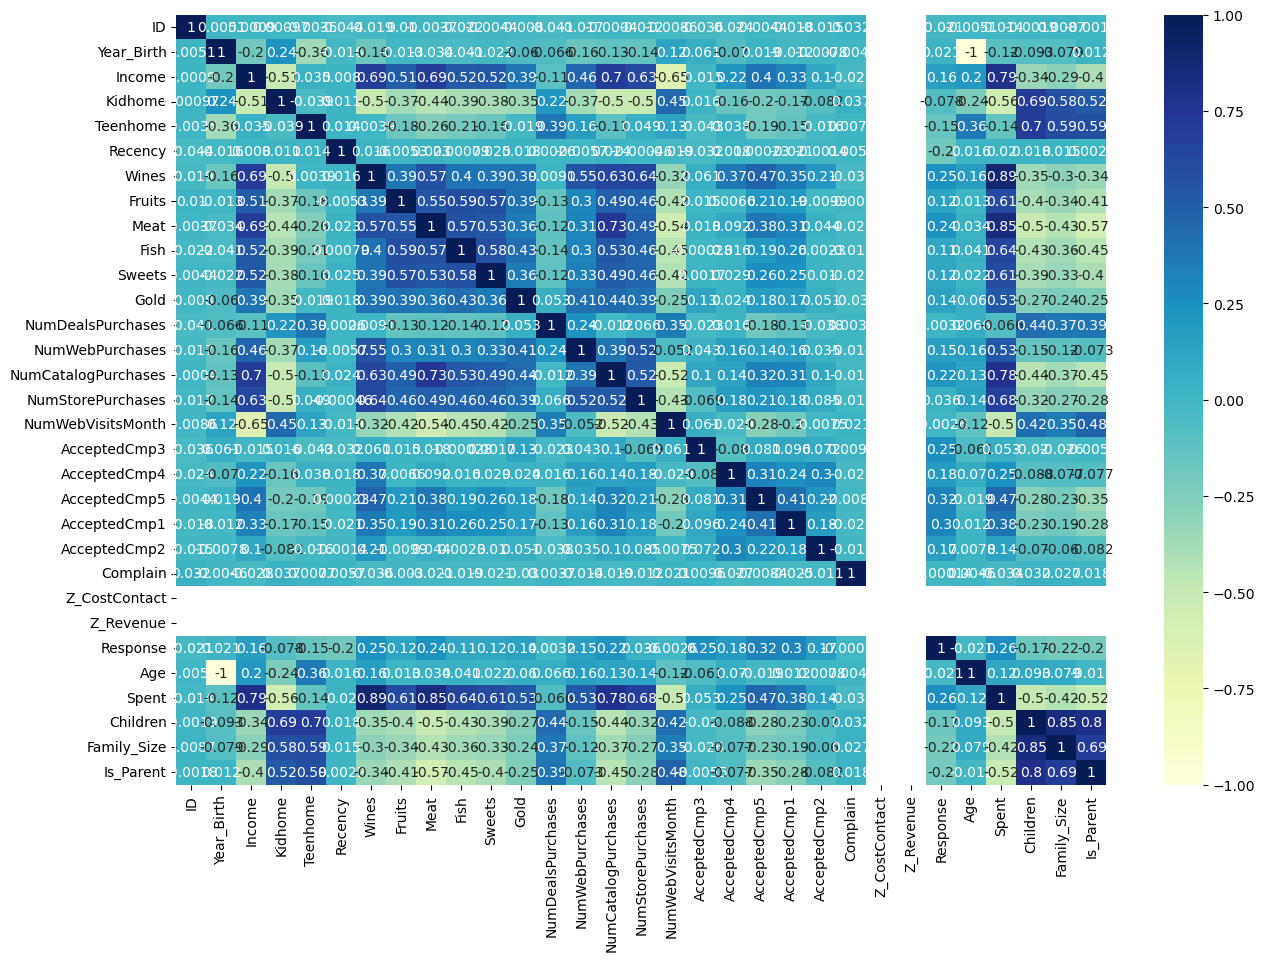

In [20]:
# checking for the correlation 
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu");

## Data Preprocessing

In [21]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wines                           int64
Fruits                          int64
Meat                            int64
Fish                            int64
Sweets                          int64
Gold                            int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [22]:
# working with categorical data 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

for i in object_cols:
    data[i] = data[[i]].apply(LabelEncoder().fit_transform)

In [23]:
# creating a copy 
df = data.copy()

cols_deleted = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

df.drop(cols_deleted, axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,1,4,58138.0,0,0,2012-04-09,58,635,...,7,3,11,NaT,66,1617,0,0,1,0
1,2174,1954,1,4,46344.0,1,1,2014-08-03,38,11,...,5,3,11,NaT,69,27,0,2,3,1
2,4141,1965,1,5,71613.0,0,0,2013-08-21,26,426,...,4,3,11,NaT,58,776,1,0,2,0
3,6182,1984,1,5,26646.0,1,0,2014-10-02,26,11,...,6,3,11,NaT,39,53,1,1,3,1
4,5324,1981,2,3,58293.0,1,0,2014-01-19,94,173,...,5,3,11,NaT,42,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,3,61223.0,0,1,2013-06-13,46,709,...,5,3,11,NaT,56,1341,1,1,3,1
2236,4001,1946,2,5,64014.0,2,1,2014-10-06,56,406,...,7,3,11,NaT,77,444,1,3,5,1
2237,7270,1981,1,2,56981.0,0,0,2014-01-25,91,908,...,6,3,11,NaT,42,1241,0,0,1,0
2238,8235,1956,2,5,69245.0,0,1,2014-01-24,8,428,...,3,3,11,NaT,67,843,1,1,3,1


In [24]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wines                           int64
Fruits                          int64
Meat                            int64
Fish                            int64
Sweets                          int64
Gold                            int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [25]:
# converting columns as I was getting promotion errors
df["Dt_Customer"] = df["Dt_Customer"].values.astype('float64')
df["Customer_For"] = df["Customer_For"].values.astype("float64")

In [26]:
# Scaling data
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [27]:
scaled_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.018837,-1.018352,-0.507308,0.254760,0.287105,-0.822754,-0.929699,-1.973583,0.310353,0.977660,...,0.0,0.0,2.375425,0.0,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-1.050626,-1.274785,-0.507308,0.254760,-0.260882,1.040021,0.908097,1.665144,-0.380813,-0.872618,...,0.0,0.0,-0.420977,0.0,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.444797,-0.334530,-0.507308,1.183144,0.913196,-0.822754,-0.929699,0.172664,-0.795514,0.357935,...,0.0,0.0,-0.420977,0.0,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,0.183824,1.289547,-0.507308,1.183144,-1.176114,1.040021,-0.929699,1.923210,-0.795514,-0.872618,...,0.0,0.0,-0.420977,0.0,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,-0.080437,1.033114,0.979003,-0.673624,0.294307,1.040021,-0.929699,0.822130,1.554453,-0.392257,...,0.0,0.0,-0.420977,0.0,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1.627712,-0.163575,-0.507308,-0.673624,0.430444,-0.822754,0.908097,-0.124112,-0.104347,1.197084,...,0.0,0.0,-0.420977,0.0,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,-0.487916,-1.958607,0.979003,1.183144,0.560123,2.902796,0.908097,1.940414,0.241237,0.298631,...,0.0,0.0,-0.420977,0.0,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,0.518925,1.033114,-0.507308,-1.602008,0.233347,-0.822754,-0.929699,0.847936,1.450778,1.787156,...,0.0,0.0,-0.420977,0.0,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.816141,-1.103830,0.979003,1.183144,0.803172,-0.822754,0.908097,0.843635,-1.417564,0.363866,...,0.0,0.0,-0.420977,0.0,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


## Dimensionality Reduction 

In [28]:
from sklearn.decomposition import PCA

# reducing to 3 features 

pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))

In [29]:
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-5.139550e-17,2.961933,-5.895415,-2.584673,-0.848564,2.282038,8.450988
col2,2212.0,1.284887e-17,1.783168,-4.695799,-1.479911,-0.000067,1.334449,6.068422
col3,2212.0,0.000000e+00,1.424180,-4.053857,-0.949594,-0.041745,0.820490,5.947336


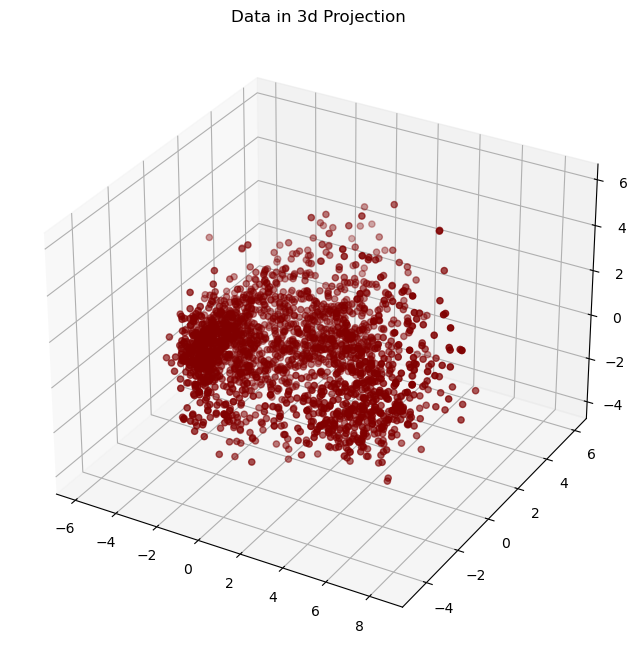

In [30]:
# plotting the data 

x = pca_df["col1"]
y = pca_df["col2"]
z = pca_df["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c="maroon", marker='o')
ax.set_title("Data in 3d Projection")
plt.show()

## Clustering

In [31]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

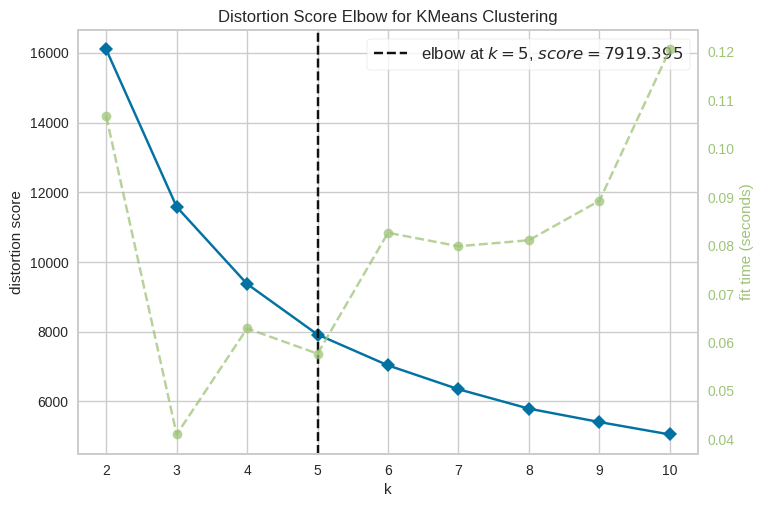

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Using Elbow Method to determine the clustor to be formed
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

In [33]:
# get the final clusters 

model = AgglomerativeClustering(n_clusters=4)

#fit the model and predict 

prediction = model.fit_predict(pca_df)

pca_df["Clusters"] = prediction
data["Clusters"] = prediction

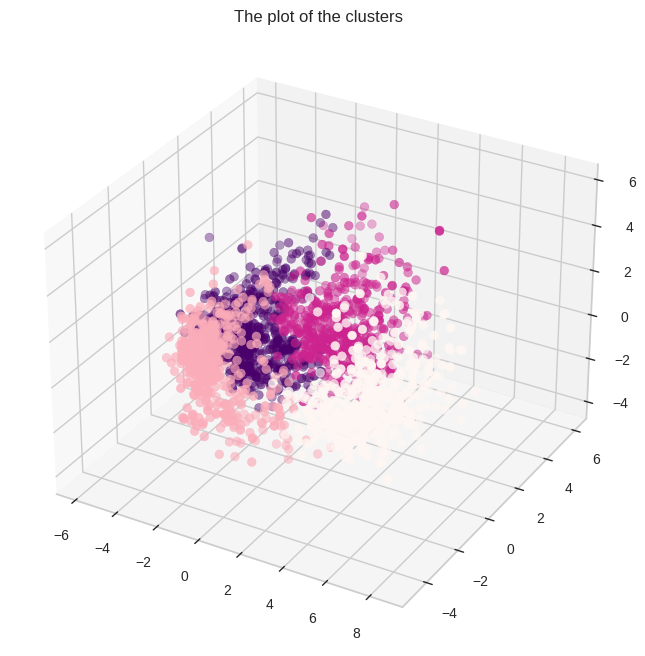

In [34]:
# plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection= "3d", label="bla")
ax.scatter(x,y,z, s=40, c=pca_df["Clusters"], marker="o", cmap="RdPu")
ax.set_title("The plot of the clusters")
plt.show()

## Evaluating Models

This is an unsupervised learning problem so we will be using EDA only for evaluation

In [35]:
pca_df

,col1,col2,col3,Clusters
0,4.964571,-0.064549,0.302907,0
1,-2.894036,0.749932,-1.772996,3
2,2.376031,-0.503257,-1.353271,0
3,-2.803937,-2.004209,0.184259,1
4,-0.839993,-0.347302,0.656363,3
...,...,...,...,...
2207,2.073865,2.016124,0.298151,2
2208,-2.445944,4.556347,0.623273,3
2209,2.656883,-1.840066,0.450170,0
2210,1.338430,2.220000,-1.627760,2


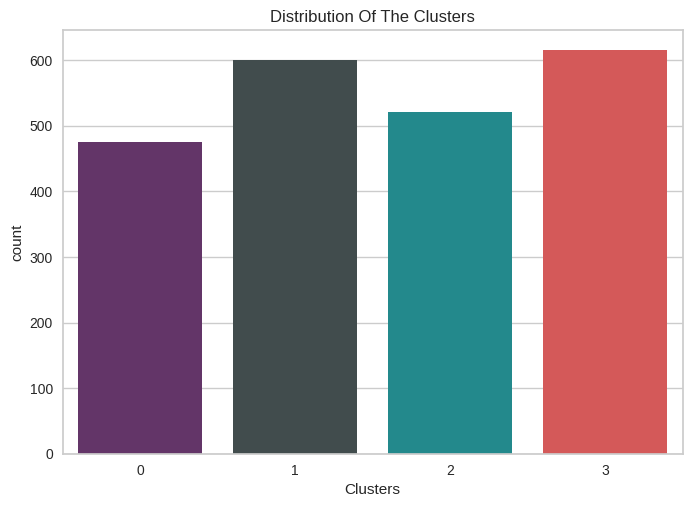

In [36]:
# counter plot of clusters

colors = ["#6A2C70","#3F4E4F", "#11999E", "#E84545"]
plot = sns.countplot(x = data["Clusters"], palette = colors)
plot.set_title("Distribution Of The Clusters")
plt.show()

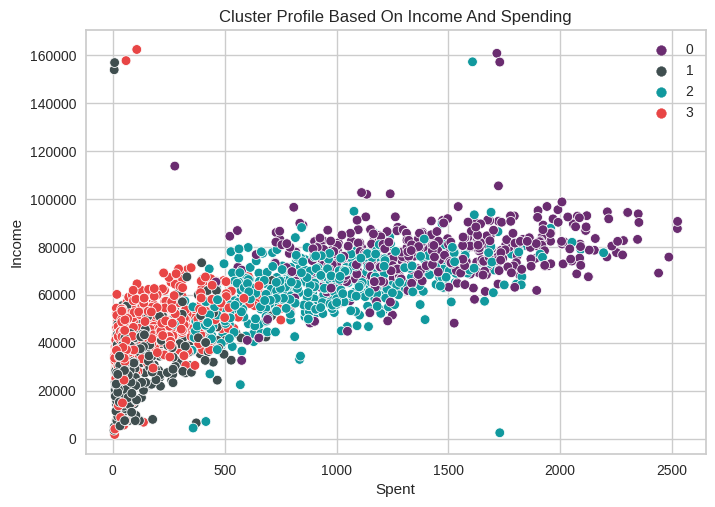

In [37]:
# Cluster profile based on income and spending

scatter = sns.scatterplot(data = data, x = data["Spent"], y = data["Income"], hue = data["Clusters"], palette = colors)
plt.title("Cluster Profile Based On Income And Spending")
plt.legend()
plt.show()

* group 2: high spending & average income
* group 0: high spending & high income
* group 1: low spending & low income
* group 3: high spending & low income

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.9% of the points cannot be place

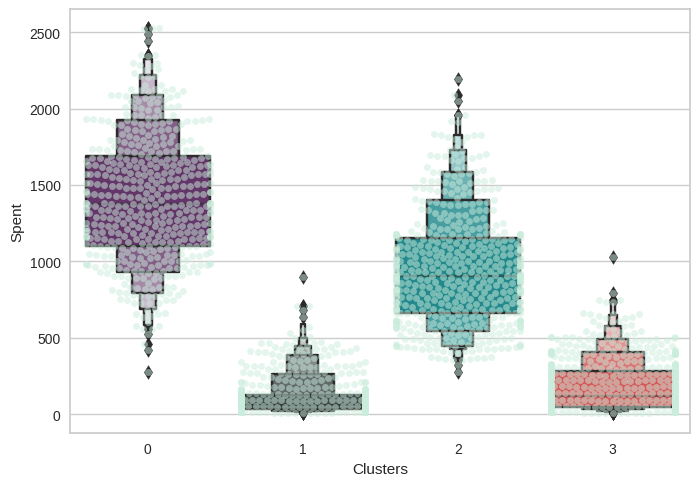

In [38]:
plt.figure()
plot = sns.swarmplot(x = data["Clusters"], y = data["Spent"], color = "#CBEDDD", alpha=0.5)
plot = sns.boxenplot(x = data["Clusters"], y = data["Spent"], palette = colors)
plt.show()

1 is bigger followed by 2

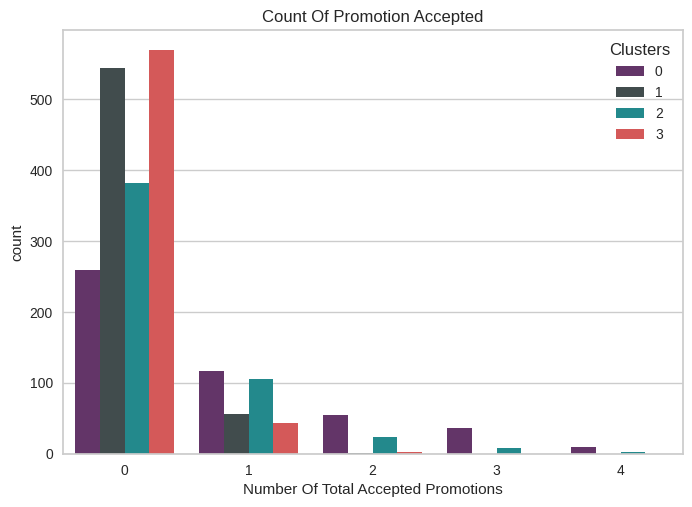

In [39]:
# Performance in past 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= colors)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

People don't seem to be participating in campagins maybe we need to modify the strategies. 

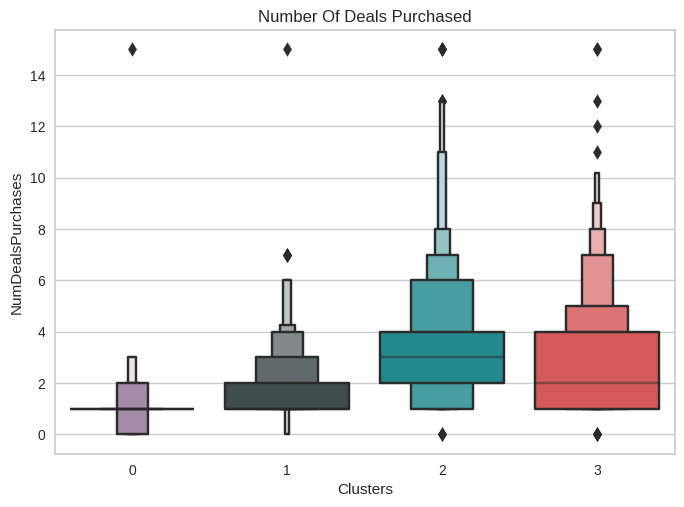

In [40]:
# Number of deals purchased
plt.figure()

plot = sns.boxenplot(y = data["NumDealsPurchases"], x = data["Clusters"], palette = colors)
plot.set_title("Number Of Deals Purchased")
plt.show()

Low and average income individuals seems to be into the deal unlike people from clusters  0 and 1

## Customer Profiling

* group 2: high spending & average income
* group 0: high spending & high income
* group 1: low spending & low income
* group 3: high spending & low income

<Figure size 800x550 with 0 Axes>

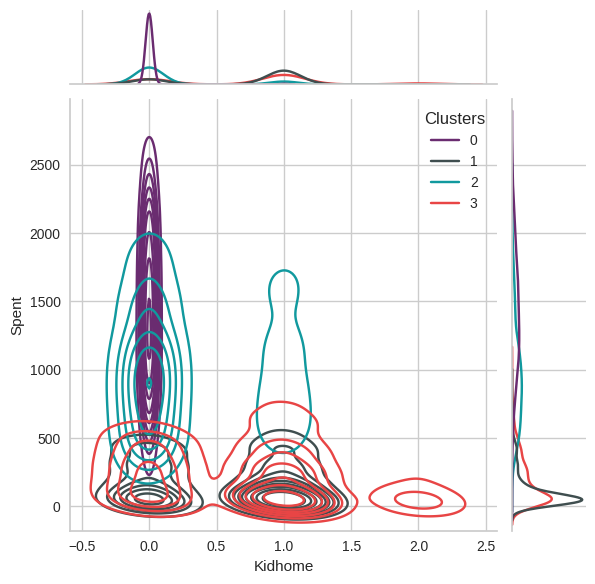

<Figure size 800x550 with 0 Axes>

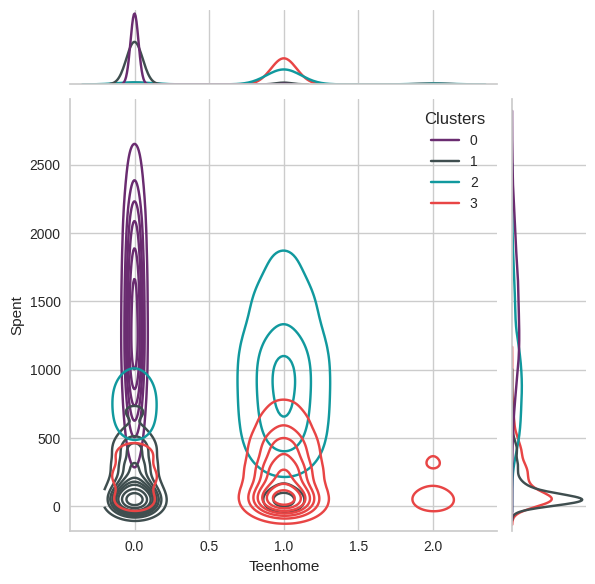

<Figure size 800x550 with 0 Axes>

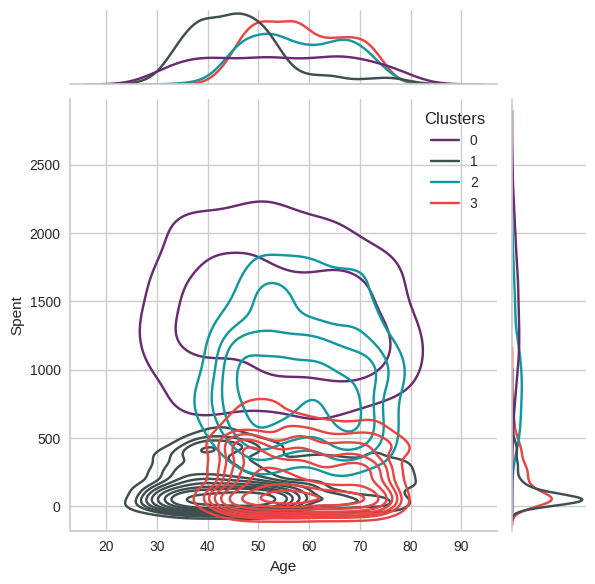

<Figure size 800x550 with 0 Axes>

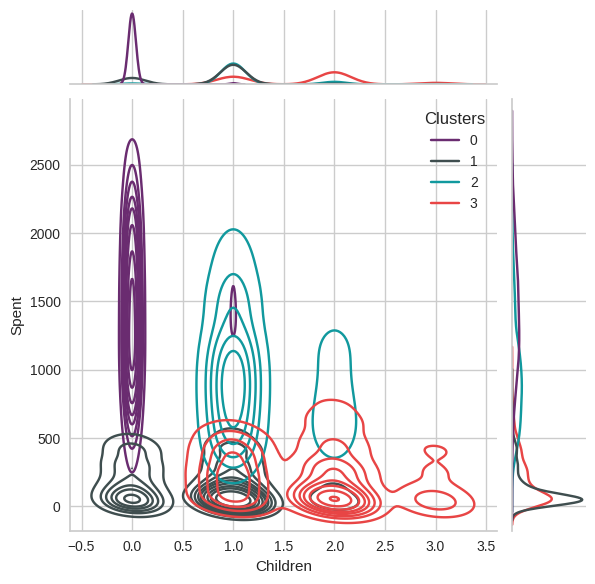

<Figure size 800x550 with 0 Axes>

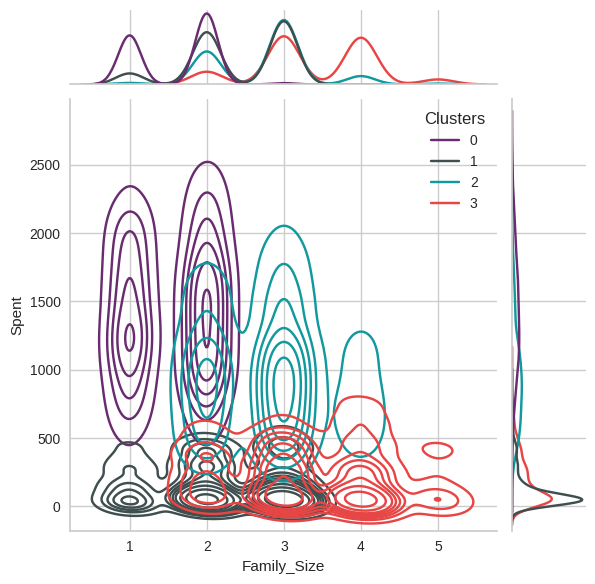

<Figure size 800x550 with 0 Axes>

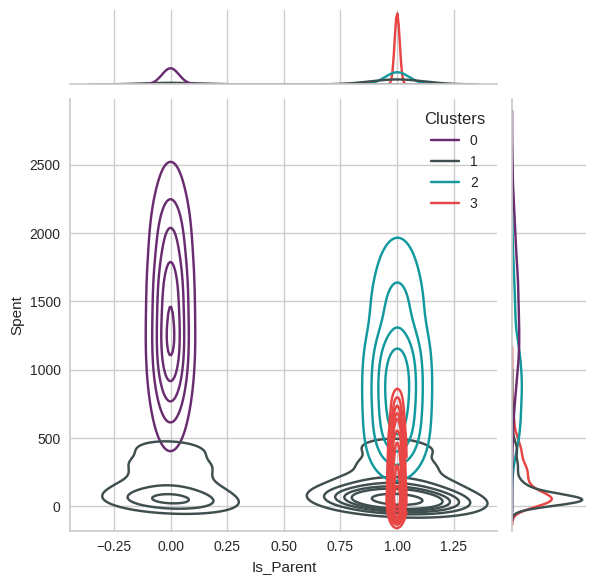

<Figure size 800x550 with 0 Axes>

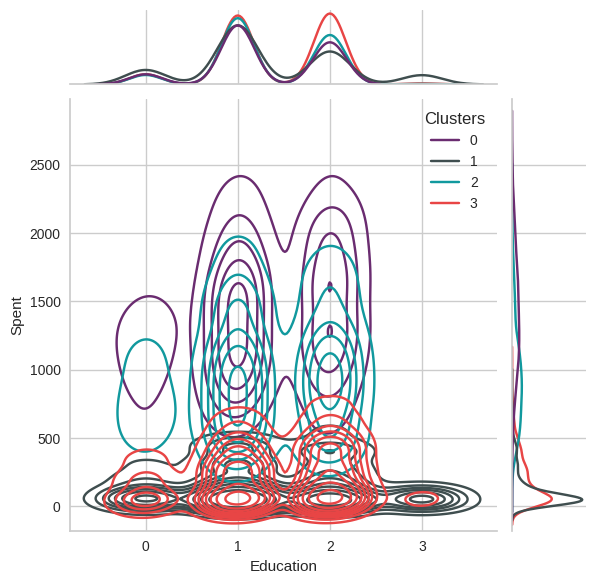

<Figure size 800x550 with 0 Axes>

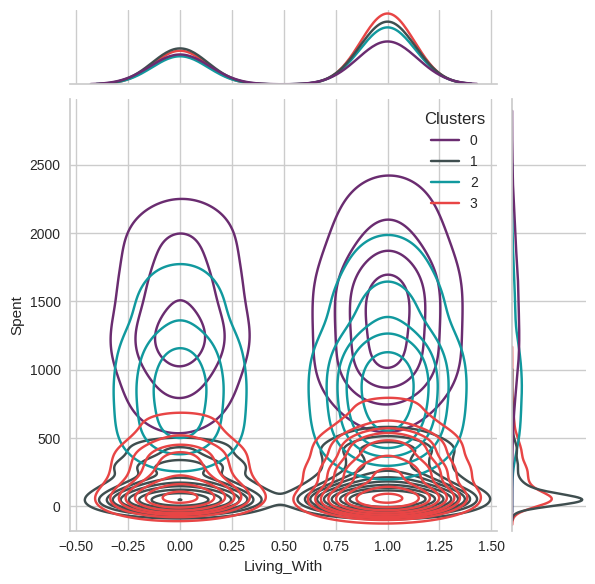

In [41]:
customer_details = [ "Kidhome","Teenhome",  "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
for i in customer_details:
    plt.figure()
    sns.jointplot(x = data[i], y = data["Spent"], hue = data["Clusters"], kind = "kde", palette = colors)
    plt.show()